<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Importing Modules and Libraries</p>
</div>


In [1]:
import seaborn as sb
import catboost
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Loading</p>
</div>


In [2]:
data=sb.load_dataset("titanic")

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Cleaning</p>
</div>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.duplicated().sum()

107

In [5]:
data.drop_duplicates(inplace=True)

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px;">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #e67e22; font-size: 140%; margin: 0;">Using Data Visualisation For Filling Data and Getting Insights</p>
</div>


Text(0.5, 1.0, 'Age Frequency')

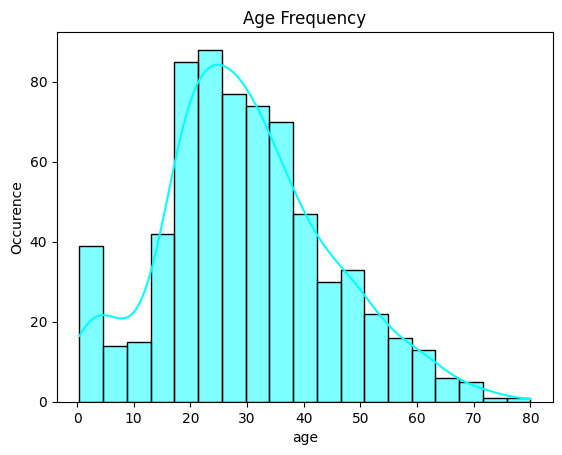

In [6]:
sb.histplot(data['age'],kde=True,color='cyan')
plt.ylabel('Occurence')
plt.title('Age Frequency')

In [7]:
data.age.mode()

0    24.0
Name: age, dtype: float64

<div style="border-radius: 10px; border: rgb(41, 128, 185) solid; padding: 15px; background-color: rgb(52, 73, 94); font-size: 100%; text-align: left; color: #ecf0f1; box-shadow: 0 0 15px rgba(41, 128, 185, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Mean is 29.</strong></li>
        <li><strong>Mode is 24.</strong></li>
    </ul>
</div>


In [8]:
data['age'].fillna(24,inplace=True)

In [9]:
data.drop(['deck','embarked'],axis=1,inplace=True)

In [10]:
LE=LabelEncoder()

In [11]:
data['survived']=LE.fit_transform(data.survived)

In [12]:
target=data['survived']

In [13]:
data.drop('survived',axis=1,inplace=True)

In [14]:
data=pd.get_dummies(data)

In [15]:
x=make_column_selector(dtype_include=['bool'])
for i in x(data):
    data[i]=data[i].map({False:0,True:1})

In [16]:
pd.crosstab(data.alone,target)

survived,0,1
alone,,
0,165,173
1,296,150


<Axes: xlabel='survived', ylabel='fare'>

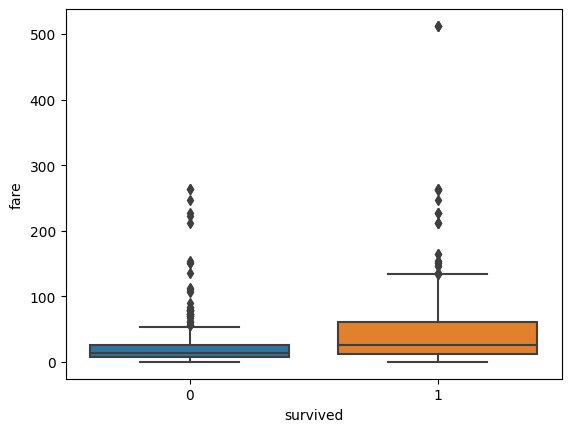

In [17]:
sb.boxplot(y=data.fare,x=target)

<div style="border-radius: 10px; border: rgb(41, 128, 185) solid; padding: 15px; background-color: rgb(52, 73, 94); font-size: 100%; text-align: left; color: #ecf0f1; box-shadow: 0 0 15px rgba(41, 128, 185, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>We observed that individuals who contributed more money were more likely to survive. This insight is derived from analyzing a dataset where 'Survived' represents the survival status (1 for survived, 0 for not survived) </strong></li>
    </ul>
</div>


In [18]:
data.age=np.ceil(data.age)

In [19]:
bar=pd.DataFrame(dict(Age=data.age,survived=target))

Text(0.5, 1.0, 'Age And Survival')

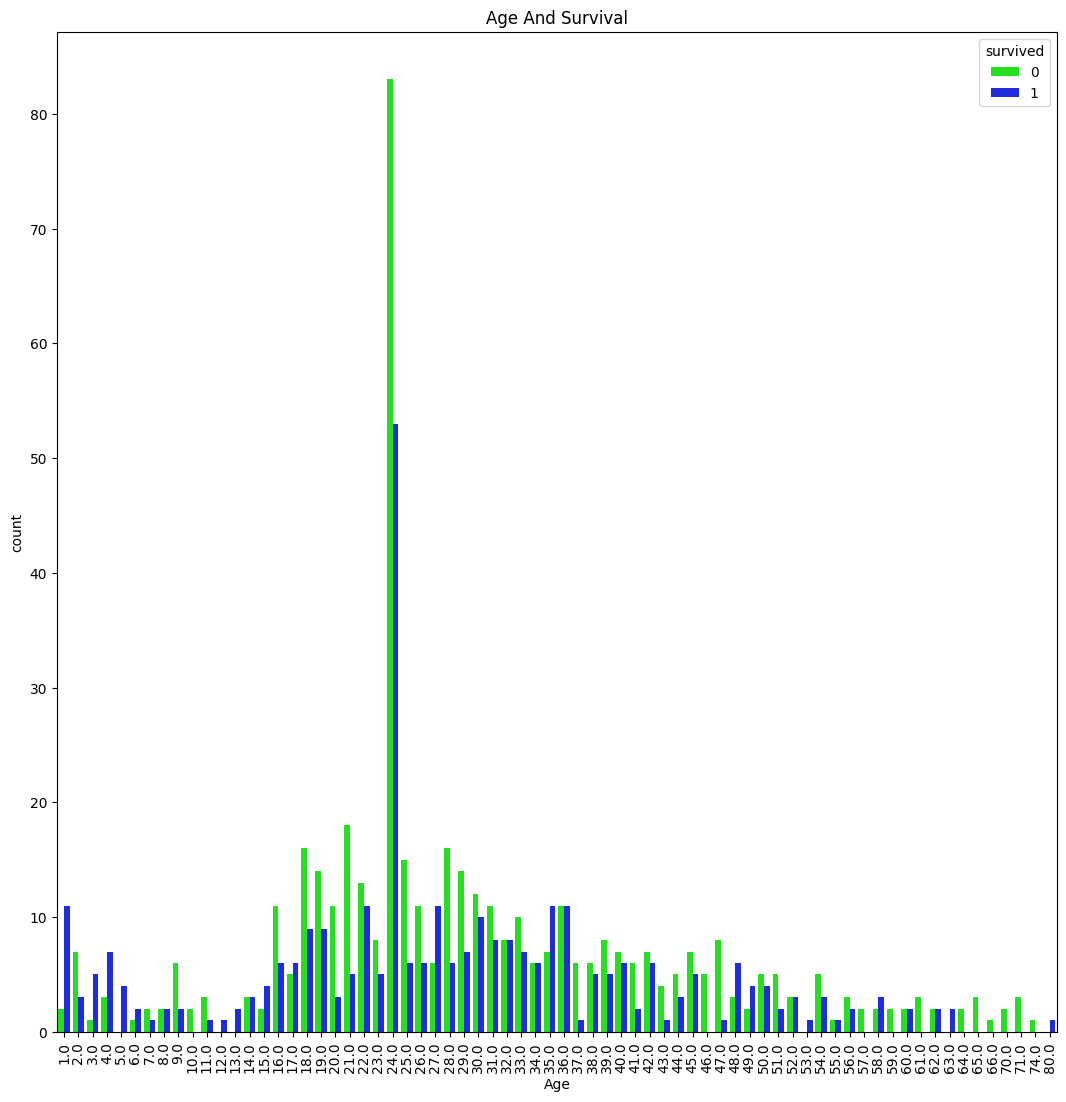

In [20]:
fig=plt.figure(figsize=(10,10))
axis=fig.add_axes([1,1,1,1])
sb.countplot(data=bar,x='Age',hue='survived',ax=axis,palette='hsv')
plt.xticks(rotation=90)
plt.title('Age And Survival')

In [21]:
bar2=bar=pd.DataFrame(dict(pclass=data.pclass,survived=target))

Text(0.5, 1.0, 'Pclass and Survival')

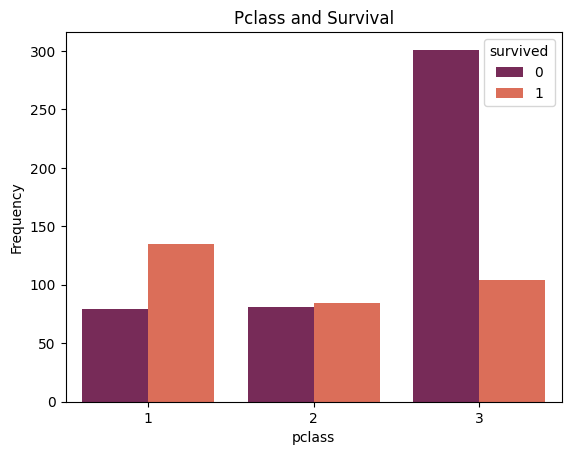

In [22]:
sb.countplot(data=bar2,x='pclass',hue='survived',palette='rocket')
plt.ylabel('Frequency')
plt.title('Pclass and Survival')

<div style="border-radius: 10px; border: rgb(41, 128, 185) solid; padding: 15px; background-color: rgb(52, 73, 94); font-size: 100%; text-align: left; color: #ecf0f1; box-shadow: 0 0 15px rgba(41, 128, 185, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Pclass 3 has very worse survival rate </strong></li>
    </ul>
</div>


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Machine Learning</p>
</div>


In [23]:
xtra,xtest,ytra,ytest=train_test_split(data,target,test_size=0.2,random_state=0)

In [24]:
model1=RandomForestClassifier()
model2=KNeighborsClassifier()
model3=DecisionTreeClassifier()
model4=SVC()
model5=xgb.XGBClassifier()
model6=LGBMClassifier()
model7=CatBoostClassifier()
model8=LogisticRegression()
model9=BaggingClassifier()

In [25]:
minmax=MinMaxScaler()
std=StandardScaler()
preprocessor=ColumnTransformer([('std',std,data.columns[:5]),('minmax',minmax,data.columns[:5])],remainder='passthrough')

In [26]:
pipe1=Pipeline(steps=[('preprocessor',preprocessor),('model1',model1)])
pipe2=Pipeline(steps=[('preprocessor',preprocessor),('model2',model2)])
pipe3=Pipeline(steps=[('preprocessor',preprocessor),('model3',model3)])
pipe4=Pipeline(steps=[('preprocessor',preprocessor),('model4',model4)])
pipe5=Pipeline(steps=[('preprocessor',preprocessor),('model5',model5)])
pipe6=Pipeline(steps=[('preprocessor',preprocessor),('model6',model6)])
pipe7=Pipeline(steps=[('preprocessor',preprocessor),('model7',model7)])
pipe8=Pipeline(steps=[('preprocessor',preprocessor),('model8',model8)])
pipe9=Pipeline(steps=[('preprocessor',preprocessor),('model9',model9)])

In [27]:
('preprocessor',preprocessor)

('preprocessor',
 ColumnTransformer(remainder='passthrough',
                   transformers=[('std', StandardScaler(),
                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                 ('minmax', MinMaxScaler(),
                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object'))]))

In [28]:
pipes=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8,pipe9]

In [29]:
for i in pipes:
    i.fit(xtra,ytra)

Learning rate set to 0.00844
0:	learn: 0.6697784	total: 57.5ms	remaining: 57.5s
1:	learn: 0.6461360	total: 58.5ms	remaining: 29.2s
2:	learn: 0.6246783	total: 59.7ms	remaining: 19.8s
3:	learn: 0.6041885	total: 61.5ms	remaining: 15.3s
4:	learn: 0.5820659	total: 62.6ms	remaining: 12.5s
5:	learn: 0.5649276	total: 64.4ms	remaining: 10.7s
6:	learn: 0.5469001	total: 66ms	remaining: 9.36s
7:	learn: 0.5290885	total: 67.5ms	remaining: 8.37s
8:	learn: 0.5130239	total: 68.9ms	remaining: 7.58s
9:	learn: 0.4979059	total: 70.8ms	remaining: 7.01s
10:	learn: 0.4819318	total: 72.1ms	remaining: 6.48s
11:	learn: 0.4682541	total: 73.7ms	remaining: 6.07s
12:	learn: 0.4499957	total: 74.6ms	remaining: 5.66s
13:	learn: 0.4380637	total: 76.5ms	remaining: 5.38s
14:	learn: 0.4209619	total: 77.3ms	remaining: 5.08s
15:	learn: 0.4096573	total: 78.8ms	remaining: 4.85s
16:	learn: 0.3973487	total: 80.4ms	remaining: 4.65s
17:	learn: 0.3854460	total: 82.2ms	remaining: 4.48s
18:	learn: 0.3738630	total: 83.9ms	remaining: 4

In [30]:
cvscore=[]
for i in pipes:
    cvscore.append(cross_val_score(i,data,target,cv=5,verbose=2,scoring='accuracy').mean())

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

In [31]:
newdata=pd.DataFrame(dict(models=[],cvscore=[]))

In [32]:
models=['model{}'.format(i) for i in range(1,10)]
count=0
cv=[]
for i in pipes:
    cv.append(cvscore[count])
    count+=1

In [33]:
cons=['RandomForestClassifier()',
 'KNeighborsClassifier()',
 'DecisionTreeClassifier()',
 'SVC()',
 'XGBClassifier()',
 'LGBMClassifier()',
 'CatBoost()',
 'LogisticRegression()',
 'BaggingClassifier()']

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Result</p>
</div>


In [34]:
pd.DataFrame(dict(models=cons,cvscore=cv)).sort_values(by='cvscore',ascending=False)

,models,cvscore
0,RandomForestClassifier(),1.000000
2,DecisionTreeClassifier(),1.000000
4,XGBClassifier(),1.000000
5,LGBMClassifier(),1.000000
6,CatBoost(),1.000000
7,LogisticRegression(),1.000000
8,BaggingClassifier(),1.000000
3,SVC(),0.996178
1,KNeighborsClassifier(),0.973232


<div style="border-radius: 10px; border: 2px solid #3498db; padding: 15px; background-color: #000; font-size: 120%; text-align: center; color: #3498db; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="margin: 0; font-weight: bold; font-size: 150%; color: #3498db;">Thank You!</p>
    <p style="margin: 10px 0 20px; color: #3498db;">Wishing you a day filled with tranquility and positivity!</p>
    <p style="margin: 0; color: #3498db;">Explore the calm and soothing content we have in store for you.</p>
</div>
